In [4]:
# Builds balanced trees
def build_tree(number_list):
    
    tree = {}
    
    sorted_list = sorted(number_list)
    list_size = len(sorted_list)

    if list_size % 2 == 1:
        median_index = int(list_size / 2)
    else:
        median_index = int(list_size / 2) - 1
    
    median = sorted_list[median_index]
    tree = {'node': median}
    
    # Build branches with recursion
    if list_size > 2:
        # Once there are 2 values remaining, 
        # make a right branch only since the left value becomes the median (the node), because of median_index
        tree['left'] = build_tree(sorted_list[:median_index])
    if list_size > 1:
        # If there is more than 1 number in the list, make right branches
        tree['right'] = build_tree(sorted_list[median_index + 1:])
        
    return tree


In [5]:
# Builds unbalanced subtrees
def tree_build(elem, tree):
    if "node" not in tree:
        tree["node"] = elem
    else:
        if elem < tree["node"]:
            if "left" in tree:
                tree_build(elem, tree["left"])
            else:
                tree["left"] = {}
                tree["left"]["node"] = elem
        if elem >tree["node"]:
            if "right" in tree:
                tree_build(elem, tree["right"])
            else:
                tree["right"] = {}
                tree["right"]["node"] = elem
                
    return(tree)

# tree = {}
# for elem in l:
#     tree = tree_build(elem, tree)

# Testing 

In [19]:
# Perform depth-first search
def find_item(tree, number = None, found = False):
        
    if "left" in tree.keys():
        found = find_item(tree['left'], number, found)
        
    if "right" in tree.keys():
        found = find_item(tree['right'], number, found)
    
    if "node" in tree.keys() and tree['node'] == number:
        found = True
    
    return found

def print_results(tree, number):
    print("{} was {}found.".format(number, ("not ", "") [find_item(tree, number)]))

In [20]:
test_list = [random.randint(-1000, 1000) for _ in range(1000)]
test_number = 101

# Check to see if the number is in the list
print("{} should {}be in test_list.".format(test_number, ('not ','')[test_number in test_list]))

# Testing using depth first search
print_results(build_tree(test_list), test_number)

101 should be in test_list.
101 was found.


0	100000	3.345072031021118
1	200000	8.01508092880249
2	300000	15.494813919067383
3	400000	26.918669939041138
4	500000	41.053508043289185
5	600000	57.26642203330994
6	700000	77.94020986557007
7	800000	102.06180000305176
8	900000	130.04463505744934
9	1000000	160.64506602287292
Balanced tree builder: 58.736074924468994 
Unbalanced  tree builder: 101.90698337554932 
Total: 160.6430583000183


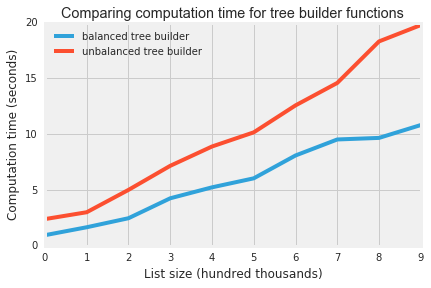

In [104]:
import numpy as np
import random
import time
import matplotlib.pyplot as plt
import seaborn as sns

sns.plt.style.use("fivethirtyeight")
%matplotlib inline


balanced_runtimes = []
unbalanced_runtimes = []

test_start = time.time()
for i in range(0, 10):
    
    random.seed(1)
    list_size = 100000 * (i + 1)
    list_sizes.append(list_size)
    
    # Timing unbalanced tree builder
    start = time.time()
    l = list(range(list_size))
    random.shuffle(l)
    # Build tree
    tree = {}
    for elem in l:
        tree = tree_build(elem, tree)
    end = time.time()
    unbalanced_runtimes.append(end - start)
    
    # Timing balanced tree builder
    start = time.time()
    test_list = [random.randint(-1000, 1000) for _ in range(list_size)]
    # Build tree
    build_tree(test_list)
    end = time.time()
    balanced_runtimes.append(end - start)
    
    print("{}\t{}\t{}".format(i, list_size, time.time() - test_start))

    
print("Balanced tree builder: {} \nUnbalanced  tree builder: {} \nTotal: {}".format(sum(balanced_runtimes), sum(unbalanced_runtimes), sum(unbalanced_runtimes) + sum(balanced_runtimes)))

fig = plt.Figure()

ax1 = plt.subplot(1,1,1)
ax1 = plt.plot(balanced_runtimes, label = "balanced tree builder")

ax2 = plt.subplot(1,1,1)
ax2 = plt.plot(unbalanced_runtimes, label = "unbalanced tree builder")

plt.title("Comparing computation time for tree builder functions")
plt.legend(loc = 'best')
plt.xlabel("List size (hundred thousands)")
plt.ylabel("Computation time (seconds)")

plt.show()

0	100000	2.919461965560913
1	200000	8.133284091949463
2	300000	16.263751983642578
3	400000	27.431050062179565
4	500000	41.69251298904419
5	600000	60.19111609458923
6	700000	81.8365330696106
7	800000	107.03461503982544
8	900000	135.2267861366272
9	1000000	167.19126105308533
Balanced tree builder: 5.237386465072632 
Unbalanced  tree builder: 5.298179626464844 
Total: 10.535566091537476


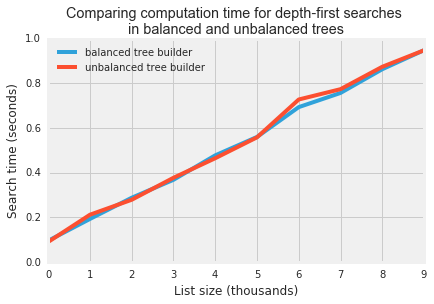

In [106]:
# list_sizes = []
balanced_runtimes = []
unbalanced_runtimes = []

test_start = time.time()
for i in range(0, 10):
    random.seed(1)
    list_size = 100000 * (i + 1)
    list_sizes.append(list_size)

    # Timing unbalanced tree builder
    l = list(range(list_size))
    random.shuffle(l)
    # Build tree
    tree = {}
    for elem in l:
        tree = tree_build(elem, tree)
    
    start = time.time()
    find_item(tree, number = 1001)
    end = time.time()
    unbalanced_runtimes.append(end - start)
    
    # Timing balanced tree builder
    test_list = [random.randint(-1000, 1000) for _ in range(list_size)]
    # Build tree
    build_tree(test_list)
    
    start = time.time()
    find_item(tree, number = 1001)
    end = time.time()
    balanced_runtimes.append(end - start)
    
    print("{}\t{}\t{}".format(i, list_size, time.time() - test_start))

print("Balanced tree builder: {} \nUnbalanced  tree builder: {} \nTotal: {}".format(sum(balanced_runtimes), sum(unbalanced_runtimes), sum(unbalanced_runtimes) + sum(balanced_runtimes)))

fig = plt.Figure()

ax1 = plt.subplot(1,1,1)
ax1 = plt.plot(balanced_runtimes, label = "balanced tree builder")

ax2 = plt.subplot(1,1,1)
ax2 = plt.plot(unbalanced_runtimes, label = "unbalanced tree builder")

# ax3 = plt.subplot(1,1,1)
# ax3 = plt.plot([np.log(size) / 14 for size in list_sizes], 'r--', label = 'log(n)')

plt.title("Comparing computation time for depth-first searches \nin balanced and unbalanced trees")
plt.legend(loc = 'best')
plt.xlabel("List size (thousands)")
plt.ylabel("Search time (seconds)")

plt.show()

0	100000	3.026563882827759
1	200000	7.790627956390381
2	300000	15.638239860534668
3	400000	26.48041582107544
4	500000	40.16700792312622
5	600000	56.389622926712036
6	700000	76.73312187194824
7	800000	100.159099817276
8	900000	127.78174090385437
9	1000000	157.14513087272644
Balanced tree builder: 0.0003266334533691406 
Unbalanced  tree builder: 0.00016260147094726562 
Total: 0.0004892349243164062


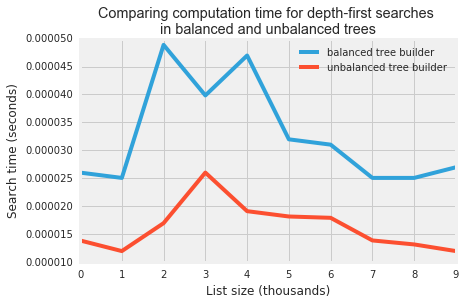

In [108]:
def finditem(tree, entry):
    flag = False
    
    if entry == tree["node"]:
        flag = True
    
    if entry < tree["node"]:
        if "left" in tree:
            flag = finditem(tree["left"], entry)
    if entry > tree["node"]:
        if "right" in tree:
            flag = finditem(tree["right"], entry)
     
    return(flag)

# list_sizes = []
balanced_runtimes = []
unbalanced_runtimes = []

test_start = time.time()
for i in range(0, 10):
    random.seed(1)
    list_size = 100000 * (i + 1)
    list_sizes.append(list_size)

    # Timing unbalanced tree builder
    l = list(range(list_size))
    random.shuffle(l)
    # Build tree
    tree = {}
    for elem in l:
        tree = tree_build(elem, tree)
    
    start = time.time()
    finditem(tree, entry = 1001)
    end = time.time()
    unbalanced_runtimes.append(end - start)
    
    # Timing balanced tree builder
    test_list = [random.randint(-1000, 1000) for _ in range(list_size)]
    # Build tree
    build_tree(test_list)
    
    start = time.time()
    finditem(tree, entry = 1001)
    end = time.time()
    balanced_runtimes.append(end - start)
    
    print("{}\t{}\t{}".format(i, list_size, time.time() - test_start))

print("Balanced tree builder: {} \nUnbalanced  tree builder: {} \nTotal: {}".format(sum(balanced_runtimes), sum(unbalanced_runtimes), sum(unbalanced_runtimes) + sum(balanced_runtimes)))

fig = plt.Figure()

ax1 = plt.subplot(1,1,1)
ax1 = plt.plot(balanced_runtimes, label = "balanced tree builder")

ax2 = plt.subplot(1,1,1)
ax2 = plt.plot(unbalanced_runtimes, label = "unbalanced tree builder")

# ax3 = plt.subplot(1,1,1)
# ax3 = plt.plot([np.log(size) / 14 for size in list_sizes], 'r--', label = 'log(n)')

plt.title("Comparing computation time for depth-first searches \nin balanced and unbalanced trees")
plt.legend(loc = 'best')
plt.xlabel("List size")
plt.ylabel("Search time (seconds)")

plt.show()